## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters

csvpath = Path("Resources/bitstamp.csv")
bitstamp = pd.read_csv(csvpath, index_col="Timestamp", parse_dates=True, infer_datetime_format=True)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.

display(bitstamp.head())
display(bitstamp.tail())

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106
2018-03-31 23:58:00,6927.65,6929.42,6927.65,$6927.65,0.839507,5817.007705,6929.080007
2018-03-31 23:59:00,6929.98,6929.98,6928.00,$6928.01,0.209363,1450.735763,6929.289993


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters

csvpath = Path("Resources/coinbase.csv")
coinbase = pd.read_csv(csvpath, index_col="Timestamp", parse_dates=True, infer_datetime_format=True)

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.

display(coinbase.head())
display(coinbase.tail())

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame

bitstamp.dropna(inplace=True)

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [7]:
# Use the str.replace function to remove the dollar sign, $

bitstamp['Close'] = bitstamp['Close'].str.replace('$', '', regex=False)
display(bitstamp.head())

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329


### Step 3: Convert the data type of the Close column to a `float`.

In [8]:
# Convert the Close data type to a float

bitstamp['Close'] = bitstamp['Close'].astype('float')
display(bitstamp.dtypes)

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [9]:
# Review the data for duplicate values, and drop them if necessary

if bitstamp.duplicated().sum() != 0:
    display(bitstamp.duplicated())
    print("Duplicate values deleted.")
    bitstamp.drop_duplicates(inplace=True)
else:
    print("No duplicate values found.")

No duplicate values found.


### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [10]:
# Repeat Steps 1–4 for the coinbase DataFrame

coinbase.dropna(inplace=True)
coinbase['Close'] = coinbase['Close'].str.replace('$', '', regex=False).astype('float')
display(coinbase.head())


# Use a conditional (if statement) to determine if the number of duplicated values is non-zero.

if coinbase.duplicated().sum() != 0:
    display(coinbase.duplicated())
    print("Duplicate values deleted.")
    coinbase.drop_duplicates(inplace=True)
else:
    print("No duplicate values found.")

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.00,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


No duplicate values found.


## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [11]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame

bitstamp_sliced = bitstamp.loc[:, 'Close']

# Review the first five rows of the DataFrame

bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [12]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame

coinbase_sliced = coinbase.loc[:, 'Close']

# Review the first five rows of the DataFrame

coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [13]:
# Generate the summary statistics for the bitstamp DataFrame

bitstamp.describe(include='all')

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129067.000000,129067.000000,129067.000000,129067.000000,129067.000000,1.290670e+05,129067.000000
mean,10459.993683,10472.970114,10446.214703,10459.842453,11.792878,1.177496e+05,10459.384448
std,2315.909269,2318.929342,2312.331601,2315.976088,21.799938,2.070551e+05,2315.723480
min,5945.950000,5975.060000,5920.720000,5944.000000,0.000039,3.333436e-01,5949.997212
25%,8613.985000,8621.655000,8604.440000,8613.370000,1.711874,1.773244e+04,8613.587020
50%,10145.300000,10156.410000,10131.740000,10145.950000,4.994095,5.188050e+04,10144.740411
75%,11444.455000,11453.990000,11431.970000,11444.810000,12.717950,1.313104e+05,11443.791560
max,17234.980000,17234.990000,17214.960000,17234.980000,580.646391,5.483271e+06,17227.810502


In [14]:
# Generate the summary statistics for the coinbase DataFrame

coinbase.describe(include='all')

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129322.000000,129322.000000,129322.000000,129322.000000,129322.000000,1.293220e+05,129322.000000
mean,10449.213185,10456.118514,10441.872248,10449.140958,15.666556,1.572565e+05,10448.964130
std,2317.194653,2317.710389,2316.570594,2317.197419,27.481647,2.667879e+05,2317.167139
min,5882.300000,5907.280000,5873.000000,5882.310000,0.000442,6.699174e+00,5883.394912
25%,8609.230000,8613.872500,8603.505000,8609.230000,2.999125,3.071222e+04,8609.135020
50%,10137.440000,10145.900000,10127.880000,10137.440000,7.092572,7.461366e+04,10136.035004
75%,11397.522500,11400.000000,11390.000000,11397.237500,16.954279,1.754530e+05,11396.970843
max,17178.000000,17178.000000,17177.990000,17177.990000,959.084903,1.152334e+07,17177.995495


<AxesSubplot:title={'center':'Bitstamp Close'}, xlabel='Timestamp'>

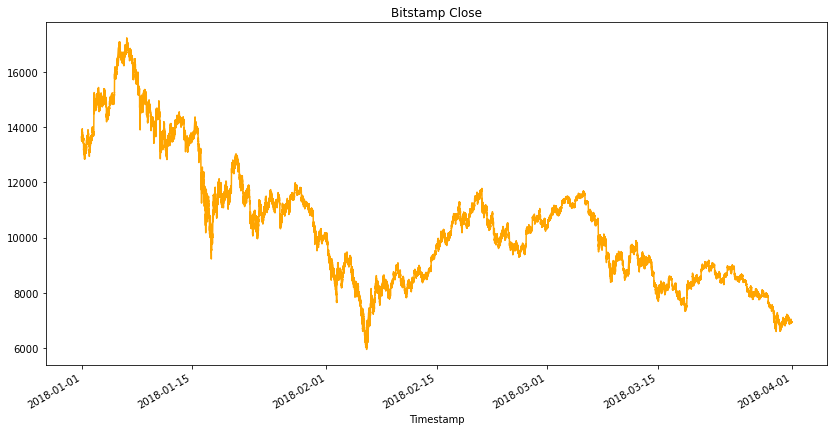

In [15]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization

bitstamp_sliced.plot(figsize=(14,7), title="Bitstamp Close", color="orange")

<AxesSubplot:title={'center':'Coinbase Close'}, xlabel='Timestamp'>

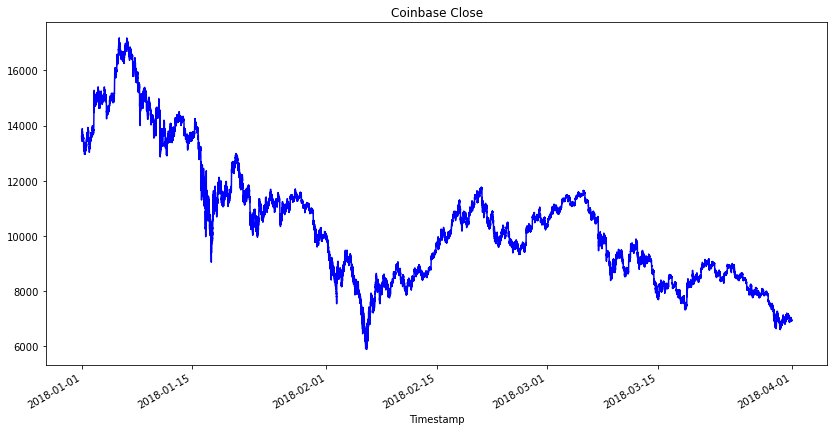

In [16]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization

coinbase_sliced.plot(figsize=(14,7), title="Coinbase Close", color="blue")

<AxesSubplot:title={'center':'Bitstamp & Coinbase Close'}, xlabel='Timestamp'>

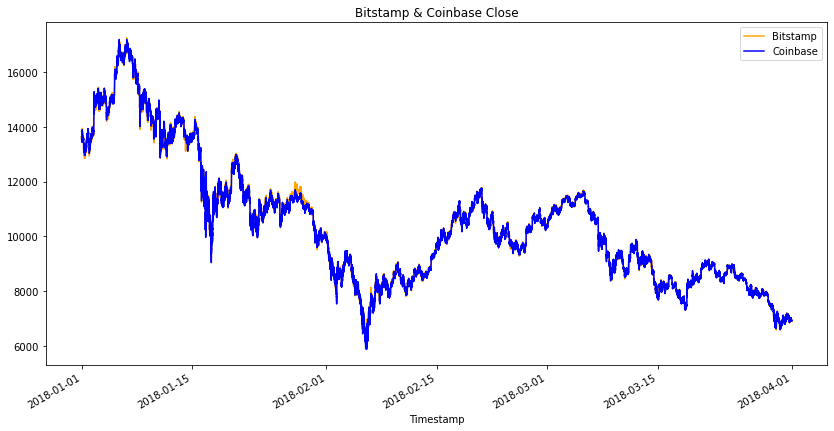

In [17]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label

bitstamp_sliced.plot(figsize=(14,7), title="Bitstamp & Coinbase Close", color="orange", legend=True, label="Bitstamp")
coinbase_sliced.plot(figsize=(14,7), color="blue", legend=True, label="Coinbase")

<AxesSubplot:title={'center':'Closing Prices from 2018-01-01 to 2018-01-31'}, xlabel='Timestamp'>

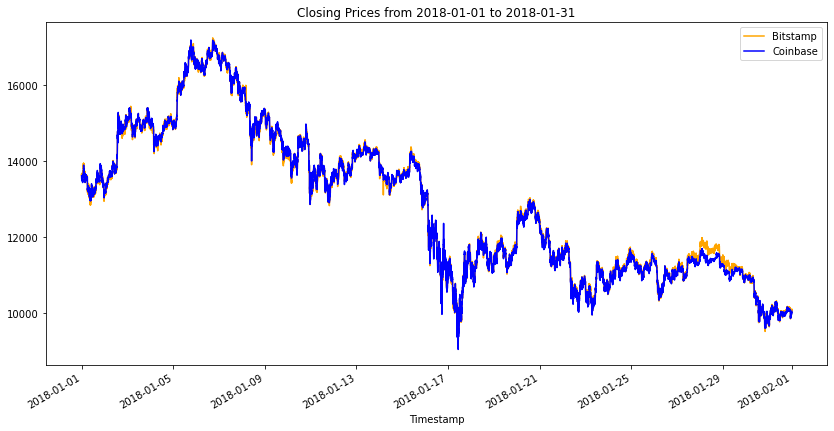

In [18]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label

start_date = "2018-01-01"
end_date = "2018-01-31"
title = f"Closing Prices from {start_date} to {end_date}"
bitstamp_sliced.loc[start_date:end_date].plot(figsize=(14,7), title=title, color="orange", legend=True, label="Bitstamp")
coinbase_sliced.loc[start_date:end_date].plot(figsize=(14,7), color="blue", legend=True, label="Coinbase")

<AxesSubplot:title={'center':'Closing Prices from 2018-02-01 to 2018-02-28'}, xlabel='Timestamp'>

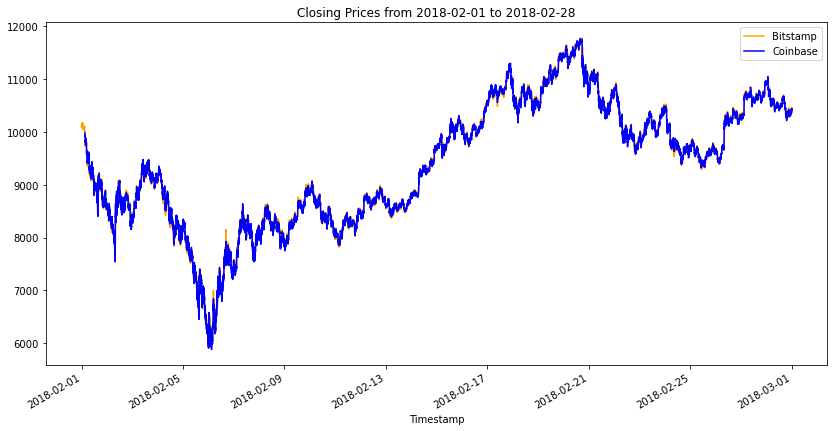

In [19]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
#  
start_date = "2018-02-01"
end_date = "2018-02-28"
title = f"Closing Prices from {start_date} to {end_date}"
bitstamp_sliced.loc[start_date:end_date].plot(figsize=(14,7), title=title, color="orange", legend=True, label="Bitstamp")
coinbase_sliced.loc[start_date:end_date].plot(figsize=(14,7), color="blue", legend=True, label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** YOUR ANSWER HERE

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Closing Prices on 2018-01-28'}, xlabel='Timestamp'>

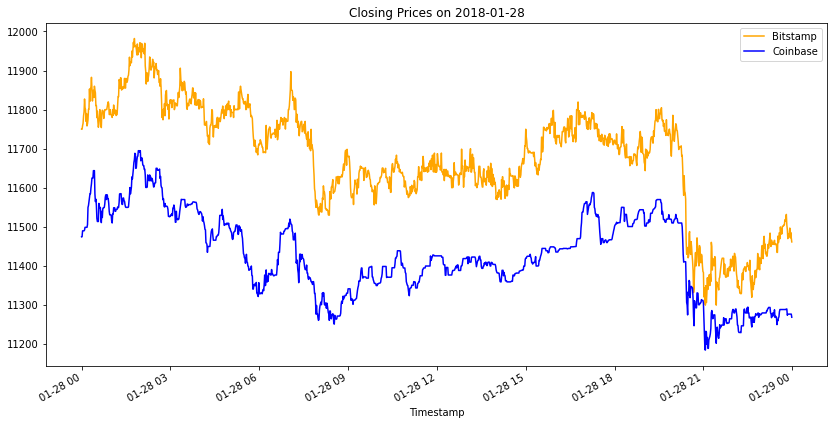

In [20]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label`
#  
early_start_date = "2018-01-28"
early_end_date = "2018-01-28"
title = f"Closing Prices on {early_start_date}"

bitstamp_early_date = bitstamp_sliced.loc[early_start_date:early_end_date]
bitstamp_early_date.plot(figsize=(14,7), title=title, color="orange", legend=True, label="Bitstamp")

coinbase_early_date = coinbase_sliced.loc[early_start_date:early_end_date]
coinbase_early_date.plot(figsize=(14,7), color="blue", legend=True, label="Coinbase")

In [21]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices

arbitrage_spread_early = bitstamp_early_date - coinbase_early_date

# Generate summary statistics for the early DataFrame

arbitrage_spread_early.describe()

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread 2018-01-28'}>

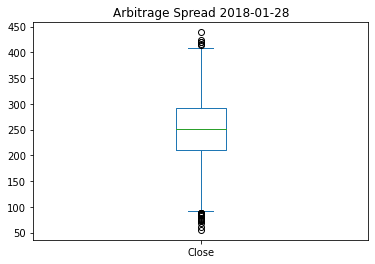

In [22]:
# Visualize the arbitrage spread from early in the dataset in a box plot

title = f"Arbitrage Spread {early_start_date}"
arbitrage_spread_early.plot(kind='box', title=title)

<AxesSubplot:title={'center':'Closing Prices on 2018-02-15'}, xlabel='Timestamp'>

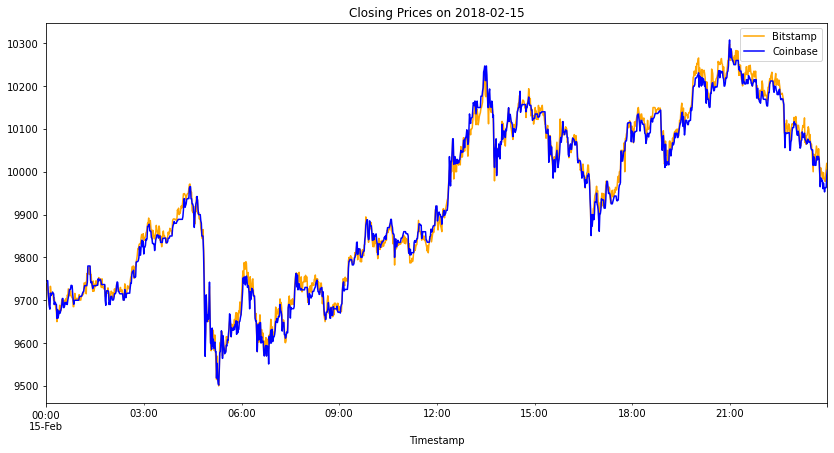

In [23]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label`
#  
middle_start_date = "2018-02-15"
middle_end_date = "2018-02-15"
title = f"Closing Prices on {middle_start_date}"

bitstamp_middle_date = bitstamp_sliced.loc[middle_start_date:middle_end_date]
bitstamp_middle_date.plot(figsize=(14,7), title=title, color="orange", legend=True, label="Bitstamp")

coinbase_middle_date = coinbase_sliced.loc[middle_start_date:middle_end_date]
coinbase_middle_date.plot(figsize=(14,7), color="blue", legend=True, label="Coinbase")

In [24]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices

arbitrage_spread_middle = bitstamp_middle_date - coinbase_middle_date

# Generate summary statistics

arbitrage_spread_middle.describe()

count    1440.000000
mean        5.760007
std        14.908671
min       -48.800000
25%        -3.995000
50%         6.960000
75%        16.217500
max        55.470000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread 2018-02-15'}>

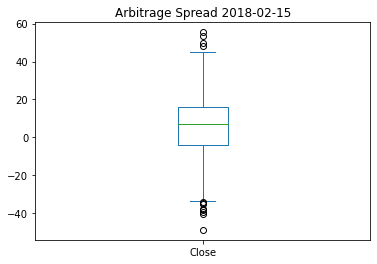

In [25]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot

title = f"Arbitrage Spread {middle_start_date}"
arbitrage_spread_middle.plot(kind='box', title=title)

<AxesSubplot:title={'center':'Closing Prices on 2018-03-29'}, xlabel='Timestamp'>

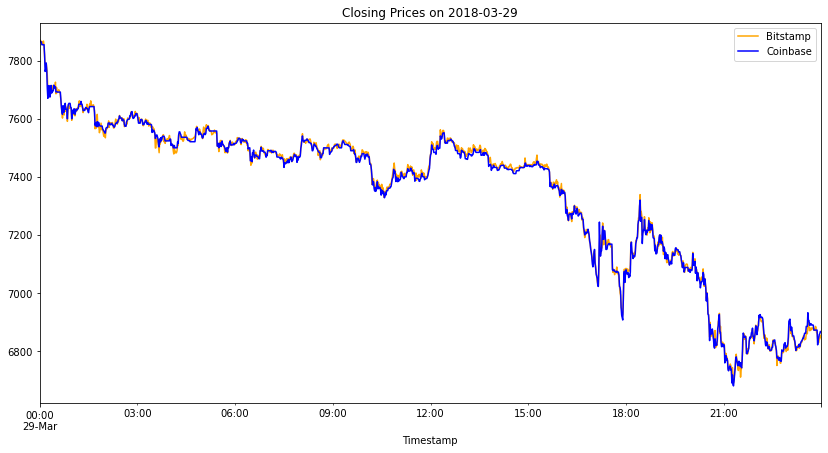

In [26]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 

late_start_date = "2018-03-29"
late_end_date = "2018-03-29"
title = f"Closing Prices on {late_start_date}"

bitstamp_late_date = bitstamp_sliced.loc[late_start_date:late_end_date]
bitstamp_late_date.plot(figsize=(14,7), title=title, color="orange", legend=True, label="Bitstamp")

coinbase_late_date = coinbase_sliced.loc[late_start_date:late_end_date]
coinbase_late_date.plot(figsize=(14,7), color="blue", legend=True, label="Coinbase")

In [27]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices

arbitrage_spread_late = bitstamp_late_date - coinbase_late_date

# Generate summary statistics for the late DataFrame

arbitrage_spread_late.describe()

count    1440.000000
mean        2.787611
std        10.030143
min       -89.900000
25%        -2.942500
50%         3.645000
75%         9.132500
max        45.600000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread 2018-03-29'}>

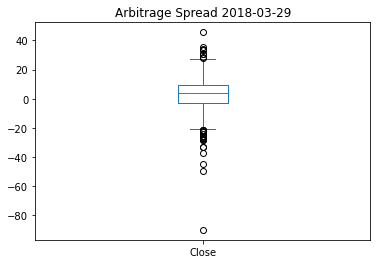

In [28]:
# Visualize the arbitrage spread from late in the dataset in a box plot

title = f"Arbitrage Spread {late_start_date}"
arbitrage_spread_late.plot(kind='box', title=title)

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [29]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one

arbitrage_spread_early = coinbase_early_date - bitstamp_early_date

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame

print(f"\nArbitrage spread on {early_start_date}")
if (coinbase_early_date - bitstamp_early_date).mean() >= 0:
    print("Coinbase averaged higher than Bitstamp")
    arbitrage_spread_early = coinbase_early_date - bitstamp_early_date
else:
    print("Bitstamp averaged higher than Coinbase")
    arbitrage_spread_early = bitstamp_early_date - coinbase_early_date
display(arbitrage_spread_early.describe())

print(f"\nArbitrage spread on {middle_start_date}")
if (coinbase_middle_date - bitstamp_middle_date).mean() >= 0:
    print("Coinbase averaged higher than Bitstamp")
    arbitrage_spread_middle = coinbase_middle_date - bitstamp_middle_date
else:
    print("Bitstamp averaged higher than Coinbase")
    arbitrage_spread_early = bitstamp_middle_date - coinbase_middle_date
display(arbitrage_spread_middle.describe())

print(f"\nArbitrage spread on {late_start_date}")
if (coinbase_late_date - bitstamp_late_date).mean() >= 0:
    print("Coinbase averaged higher than Bitstamp")
    arbitrage_spread_late = coinbase_late_date - bitstamp_late_date
else:
    print("Bitstamp averaged higher than Coinbase")
    arbitrage_spread_late = bitstamp_late_date - coinbase_late_date
display(arbitrage_spread_late.describe())


Arbitrage spread on 2018-01-28
Bitstamp averaged higher than Coinbase


count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64


Arbitrage spread on 2018-02-15
Bitstamp averaged higher than Coinbase


count    1440.000000
mean        5.760007
std        14.908671
min       -48.800000
25%        -3.995000
50%         6.960000
75%        16.217500
max        55.470000
Name: Close, dtype: float64


Arbitrage spread on 2018-03-29
Bitstamp averaged higher than Coinbase


count    1440.000000
mean        2.787611
std        10.030143
min       -89.900000
25%        -2.942500
50%         3.645000
75%         9.132500
max        45.600000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [30]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).

def calc_arbitrage_percent(df):
    if df['Bitstamp'] < df['Coinbase']:
        return 100 * df['Spread'] / df['Bitstamp']
    elif df['Bitstamp'] > df['Coinbase']:
        return 100 * df['Spread'] / df['Coinbase']
    else:
        return 0.00
    
spread_return_early = pd.DataFrame(data=[bitstamp_early_date, coinbase_early_date], index=['Bitstamp', 'Coinbase']).T
spread_return_early['Spread'] = (spread_return_early['Bitstamp'] - spread_return_early['Coinbase']).abs()
spread_return_early['Return %'] = spread_return_early.apply(calc_arbitrage_percent, axis=1)
    
spread_return_middle = pd.DataFrame(data=[bitstamp_middle_date, coinbase_middle_date], index=['Bitstamp', 'Coinbase']).T
spread_return_middle['Spread'] = (spread_return_middle['Bitstamp'] - spread_return_middle['Coinbase']).abs()
spread_return_middle['Return %'] = spread_return_middle.apply(calc_arbitrage_percent, axis=1)
    
spread_return_late = pd.DataFrame(data=[bitstamp_late_date, coinbase_late_date], index=['Bitstamp', 'Coinbase']).T
spread_return_late['Spread'] = (spread_return_late['Bitstamp'] - spread_return_late['Coinbase']).abs()
spread_return_late['Return %'] = spread_return_late.apply(calc_arbitrage_percent, axis=1)
    
# Review the spread return DataFrame

print(100*'*' + f"\nSummary statistics for {early_start_date}\n" + 100*'*')
display(spread_return_early)

print(100*'*' + f"\nSummary statistics for {middle_start_date}\n" + 100*'*')
display(spread_return_middle)

print(100*'*' + f"\nSummary statistics for {late_start_date}\n" + 100*'*')
display(spread_return_late)

****************************************************************************************************
Summary statistics for 2018-01-28
****************************************************************************************************


,Bitstamp,Coinbase,Spread,Return %
Timestamp,,,,
2018-01-28 00:00:00,11750.00,11474.62,275.38,2.399905
2018-01-28 00:01:00,11750.00,11475.00,275.00,2.396514
2018-01-28 00:02:00,11758.76,11489.99,268.77,2.339167
2018-01-28 00:03:00,11765.02,11489.99,275.03,2.393649
2018-01-28 00:04:00,11784.24,11489.98,294.26,2.561014
...,...,...,...,...
2018-01-28 23:55:00,11497.08,11276.98,220.10,1.951764
2018-01-28 23:56:00,11472.09,11276.98,195.11,1.730162
2018-01-28 23:57:00,11485.72,11276.98,208.74,1.851027


****************************************************************************************************
Summary statistics for 2018-02-15
****************************************************************************************************


,Bitstamp,Coinbase,Spread,Return %
Timestamp,,,,
2018-02-15 00:00:00,9724.33,9745.63,21.30,0.219038
2018-02-15 00:01:00,9738.90,9745.63,6.73,0.069104
2018-02-15 00:02:00,9735.99,9745.63,9.64,0.099014
2018-02-15 00:03:00,9724.45,9745.63,21.18,0.217802
2018-02-15 00:04:00,9709.91,9717.10,7.19,0.074048
...,...,...,...,...
2018-02-15 23:55:00,9977.50,9962.02,15.48,0.155390
2018-02-15 23:56:00,9990.03,9962.99,27.04,0.271404
2018-02-15 23:57:00,10007.32,9963.00,44.32,0.444846


****************************************************************************************************
Summary statistics for 2018-03-29
****************************************************************************************************


,Bitstamp,Coinbase,Spread,Return %
Timestamp,,,,
2018-03-29 00:00:00,7871.45,7869.99,1.46,0.018551
2018-03-29 00:01:00,7869.00,7865.08,3.92,0.049841
2018-03-29 00:02:00,7867.24,7865.02,2.22,0.028226
2018-03-29 00:03:00,7867.24,7865.00,2.24,0.028481
2018-03-29 00:04:00,7864.59,7855.02,9.57,0.121833
...,...,...,...,...
2018-03-29 23:55:00,6829.16,6846.23,17.07,0.249958
2018-03-29 23:56:00,6841.56,6857.14,15.58,0.227726
2018-03-29 23:57:00,6841.79,6859.99,18.20,0.266012


#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [31]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs

profitable_trades_early = spread_return_early.loc[spread_return_early['Return %'] > 1].copy()
print(f"{profitable_trades_early['Spread'].count()} profitable trades on {early_start_date}")

profitable_trades_middle = spread_return_middle.loc[spread_return_middle['Return %'] > 1].copy()
print(f"{profitable_trades_middle['Spread'].count()} profitable trades on {middle_start_date}")

profitable_trades_late = spread_return_late.loc[spread_return_late['Return %'] > 1].copy()
print(f"{profitable_trades_late['Spread'].count()} profitable trades on {late_start_date}")

# Review the first five profitable trades

display(profitable_trades_early.head())
display(profitable_trades_middle.head())
display(profitable_trades_late.head())

1378 profitable trades on 2018-01-28
0 profitable trades on 2018-02-15
1 profitable trades on 2018-03-29


,Bitstamp,Coinbase,Spread,Return %
Timestamp,,,,
2018-01-28 00:00:00,11750.00,11474.62,275.38,2.399905
2018-01-28 00:01:00,11750.00,11475.00,275.00,2.396514
2018-01-28 00:02:00,11758.76,11489.99,268.77,2.339167
2018-01-28 00:03:00,11765.02,11489.99,275.03,2.393649
2018-01-28 00:04:00,11784.24,11489.98,294.26,2.561014


,Bitstamp,Coinbase,Spread,Return %
Timestamp,,,,


,Bitstamp,Coinbase,Spread,Return %
Timestamp,,,,
2018-03-29 17:11:00,7154.33,7244.23,89.9,1.256582


#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [32]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%

display(spread_return_early.describe())
display(spread_return_middle.describe())
display(spread_return_late.describe())

,Bitstamp,Coinbase,Spread,Return %
count,1436.000000,1440.000000,1436.000000,1440.000000
mean,11675.885780,11428.265889,247.552326,2.158750
std,141.433618,106.287640,68.343472,0.606051
min,11300.000000,11185.010000,55.030000,0.000000
25%,11609.897500,11356.560000,210.022500,1.833414
50%,11691.725000,11421.005000,251.180000,2.189470
75%,11777.530000,11513.927500,290.925000,2.528815
max,11982.000000,11694.980000,439.010000,3.850968


,Bitstamp,Coinbase,Spread,Return %
count,1440.000000,1440.000000,1440.000000,1440.000000
mean,9930.236535,9924.476528,13.052576,0.131430
std,196.232293,195.447618,9.218517,0.092643
min,9500.000000,9502.100000,0.000000,0.000000
25%,9743.000000,9734.010000,5.585000,0.056604
50%,9914.490000,9909.945000,11.635000,0.117031
75%,10107.452500,10098.247500,18.972500,0.190473
max,10298.000000,10307.680000,55.470000,0.558385


,Bitstamp,Coinbase,Spread,Return %
count,1440.000000,1440.000000,1440.000000,1440.000000
mean,7344.444951,7341.657340,8.043042,0.110155
std,265.541456,263.838373,6.606397,0.091716
min,6691.280000,6680.000000,0.000000,0.000000
25%,7156.032500,7163.492500,3.370000,0.045634
50%,7451.815000,7444.350000,6.685000,0.091252
75%,7521.890000,7520.740000,11.165000,0.151563
max,7871.450000,7869.990000,89.900000,1.256582


#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [33]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased

def calc_arbitrage_profit(df):
    if df['Bitstamp'] < df['Coinbase']:
        return df['Return %'] * df['Bitstamp'] / 100
    elif df['Bitstamp'] > df['Coinbase']:
        return df['Return %'] * df['Coinbase'] / 100
    else:
        return 0.00

profit_early = profitable_trades_early.apply(calc_arbitrage_profit, axis=1)
profit_middle = profitable_trades_middle.apply(calc_arbitrage_profit, axis=1)
profit_late = profitable_trades_late.apply(calc_arbitrage_profit, axis=1)

# Drop any missing values from the profit DataFrame

profit_early.dropna()
profit_middle.dropna()
profit_late.dropna()

# View the early profit DataFrame

print(100*'*'+f"\nArbitrage profits on {early_start_date} \n")
if profitable_trades_early['Spread'].count() > 0:
    display(profit_early)
else:
    print("No profitable trades.")

# View the middle profit DataFrame

print(100*'*'+f"\nArbitrage profits on {middle_start_date} \n")
if profitable_trades_middle['Spread'].count() > 0:
    display(profit_middle)
else:
    print("No profitable trades.")

# View the late profit DataFrame

print(100*'*'+f"\nArbitrage profits on {late_start_date} \n")
if profitable_trades_late['Spread'].count() > 0:
    display(profit_late)
else:
    print("No profitable trades.")

****************************************************************************************************
Arbitrage profits on 2018-01-28 



Timestamp
2018-01-28 00:00:00    275.38
2018-01-28 00:01:00    275.00
2018-01-28 00:02:00    268.77
2018-01-28 00:03:00    275.03
2018-01-28 00:04:00    294.26
                        ...  
2018-01-28 23:55:00    220.10
2018-01-28 23:56:00    195.11
2018-01-28 23:57:00    208.74
2018-01-28 23:58:00    195.12
2018-01-28 23:59:00    192.63
Length: 1378, dtype: float64

****************************************************************************************************
Arbitrage profits on 2018-02-15 

No profitable trades.
****************************************************************************************************
Arbitrage profits on 2018-03-29 



Timestamp
2018-03-29 17:11:00    89.9
dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [34]:
# Generate the summary statistics for the early profit per trade DataFrame

print(100*'*'+f"\nProfit statistics from {early_start_date} \n")
if profitable_trades_early['Spread'].count() > 0:
    display(profit_early.describe())
else:
    print("No profitable trades.")

# Generate the summary statistics for the middle profit per trade DataFrame

print(100*'*'+f"\nProfit statistics from {middle_start_date} \n")
if profitable_trades_middle['Spread'].count() > 0:
    display(profit_middle.describe())
else:
    print("No profitable trades.")

# Generate the summary statistics for the late profit per trade DataFrame

print(100*'*'+f"\nProfit statistics from {late_start_date} \n")
if profitable_trades_late['Spread'].count() > 0:
    display(profit_late.describe())
else:
    print("No profitable trades.")

****************************************************************************************************
Profit statistics from 2018-01-28 



count    1378.000000
mean      253.931996
std        62.057953
min       113.970000
25%       217.272500
50%       254.150000
75%       292.987500
max       439.010000
dtype: float64

****************************************************************************************************
Profit statistics from 2018-02-15 

No profitable trades.
****************************************************************************************************
Profit statistics from 2018-03-29 



count     1.0
mean     89.9
std       NaN
min      89.9
25%      89.9
50%      89.9
75%      89.9
max      89.9
dtype: float64

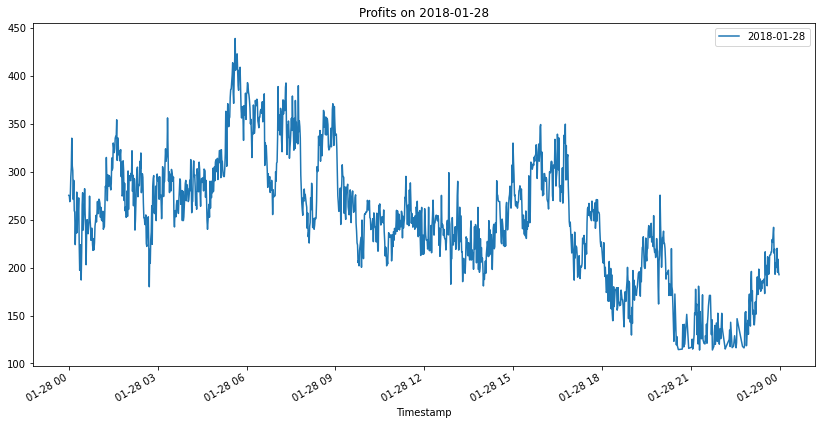

In [35]:
# Plot the results for the early profit per trade DataFrame

if profitable_trades_early['Spread'].count() > 0:
    title = f"Profits on {early_start_date}"
    profit_early.plot(figsize=(14,7), title=title, legend=True, label=f"{early_start_date}")

In [36]:
# Plot the results for the middle profit per trade DataFrame

if profitable_trades_middle['Spread'].count() > 0:
    title = f"Profits on {middle_start_date}"
    profit_middle.plot(figsize=(14,7), title=title, legend=True, label=f"{middle_start_date}")
else:
    print(f"No profitable trades to plot!")

No profitable trades to plot!


,Bitstamp,Coinbase,Spread,Return %
Timestamp,,,,
2018-03-29 17:11:00,7154.33,7244.23,89.9,1.256582


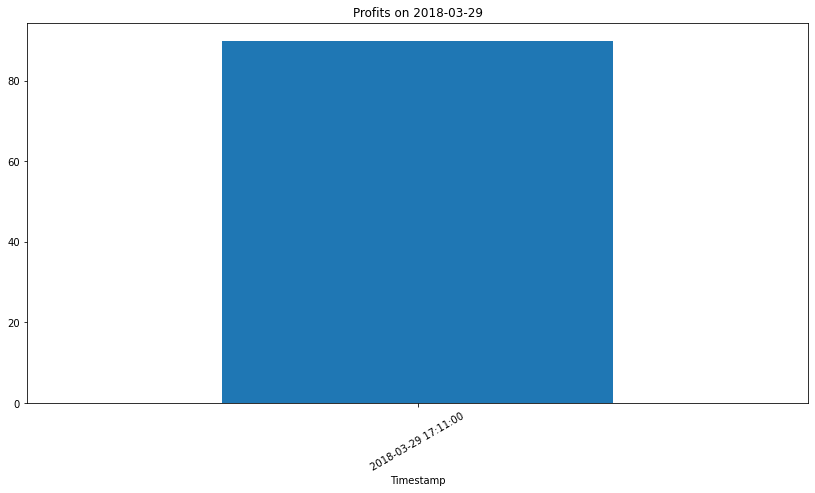

In [37]:
# Plot the results for the late profit per trade DataFrame

display(profitable_trades_late)
if profitable_trades_late['Spread'].count() > 0:
    title = f"Profits on {late_start_date}"
    profit_late.plot(kind='bar', figsize=(14,7), title=title, rot=30)
else:
    print(f"No profitable trades to plot!")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [38]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame

print(f'Total profit on {early_start_date}: ${profit_early.sum():,.2f}')

Total profit on 2018-01-28: $349,918.29


#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [40]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame

cumulative_profit_early = np.cumsum(profit_early)
display(cumulative_profit_early)

# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame

cumulative_profit_middle = np.cumsum(profit_middle)
display(cumulative_profit_middle)

# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame

cumulative_profit_late = np.cumsum(profit_late)
display(cumulative_profit_late)

Timestamp
2018-01-28 00:00:00       275.38
2018-01-28 00:01:00       550.38
2018-01-28 00:02:00       819.15
2018-01-28 00:03:00      1094.18
2018-01-28 00:04:00      1388.44
                         ...    
2018-01-28 23:55:00    349126.69
2018-01-28 23:56:00    349321.80
2018-01-28 23:57:00    349530.54
2018-01-28 23:58:00    349725.66
2018-01-28 23:59:00    349918.29
Length: 1378, dtype: float64

,Bitstamp,Coinbase,Spread,Return %
Timestamp,,,,


Timestamp
2018-03-29 17:11:00    89.9
dtype: float64

In [ ]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame

cumulative_profit_early = np.cumsum(profit_early)
display(cumulative_profit_early)

# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame

cumulative_profit_middle = np.cumsum(profit_middle)
display(cumulative_profit_middle)

# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame

cumulative_profit_late = np.cumsum(profit_late)
display(cumulative_profit_late)

In [ ]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame

if profitable_trades_early['Spread'].count() > 0:
    cumulative_profit_early.plot(figsize=(14,7), title=f"Cumulative profits on {early_start_date}")
else:
    print(f"No profitable trades on {early_start_date}")

In [ ]:
# Plot the cumulative sum of profits for the middle profit per trade DataFrame

if profitable_trades_middle['Spread'].count() > 0:
    cumulative_profit_middle.plot(figsize=(14,7), title=f"Cumulative profits on {middle_start_date}")
else:
    print(f"No profitable trades on {middle_start_date}")

In [ ]:
# Plot the cumulative sum of profits for the late profit per trade DataFrame

if profitable_trades_late['Spread'].count() > 0:
    cumulative_profit_late.plot(kind='bar', figsize=(14,7), title=f"Cumulative profits on {late_start_date}", rot=30)
else:
    print(f"No profitable trades on {late_start_date}")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** After reviewing the profit information across each date from the different time periods, the data reveals greater abitrage opportunities at the beginning of the data cyle in comparison to the end. Despite the volatility, a gradual decrease in overall arbitrage opportunities is shown over time.

URL to GitHub: https://github.com/JEKlektik/Mod_3.git